# Investigating Numpy.random

## About the package

<img src="http://www.numpy.org/_static/numpy_logo.png" width = '400'>

## Simple Random Data 

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Rand()

The Rand function returns random samples from a uniform distrubution

In [43]:
y = np.random.rand(2)
print(y)

[0.53189467 0.01658218]


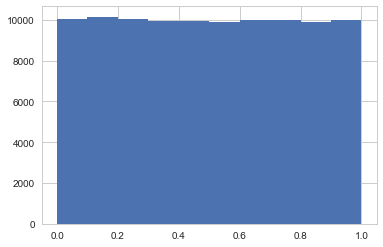

In [44]:
y = np.random.rand(100000)
sns.set_style('whitegrid')
plt.hist(y)
plt.show()

As you can see from the histogram of 100,000 random generated samples, this function returns a value between zero and one.

**Negative dimensions are not allowed.** So np.random.rand(-10) would give an error, as it's impossible to list a negative number of samples. 

### Randn()

The Randn function, gives you a random number from the standard normal distribution, with mean zero and standard deviation 1. So by the Empirical Rule, we can expect to find 99.7% of data between - 3 and +3, as shown below. 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


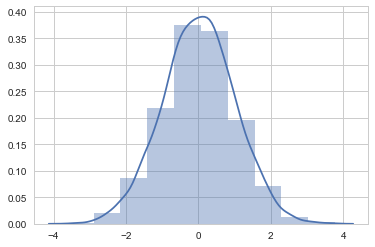

In [45]:
import pandas

#First let's plot this as a histogram, with x axis from - 5 to 5
x = np.random.randn(10000)
sns.set_style('whitegrid')
sns.distplot(x, bins = 10)
plt.show()

This data seems to fit what we had been expecting from the Empirical Rule. 

### Randint()

This function returns random integers from the Uniform Distribution. This distribution is sometimes referred to as the regtangular distribution, and results when every value in the range has equal probability of been chosen. When using Randint(), you set a low to high interval, from which randomly generated numbers are chosen. You also set size equal to the number of random integers you want from within that range. If you don't include size, then only one random integer is chosen.


**Examples:** Using randint() to generate one whole number between two values. 

1. Here, randint() will return a number between 2 and 100. It may return the integer 2, but it will never return 100. 

In [46]:
np.random.randint(2, 100)

34

2. In my second example randint() will return a negative number between - 100 and 0. It will never return 0, but may return - 100.

In [47]:
np.random.randint(-100, 0)

-24

    Note: This function will only work when the smallest number comes first. For example if you were to call np.rand.randint(100, 2), you would receive an error. 


4. Below a set of 2000 random integers are been generated. As I have only set one value, this function takes that value to be the high value, and generates numbers in the range 0 to high. Here my high is 30, so my generated set, contains 2000 numbers between 0 and 29 inclusive.

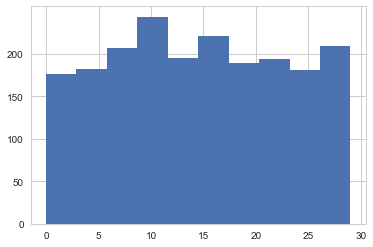

In [48]:
rand_int= np.random.randint(30, size = 2000)
sns.set_style('whitegrid')
plt.xticks(range(0, 31, 5))
plt.yticks(range(0, 250, 50))
plt.hist(rand_int)
plt.show()

## Permutations

### Shuffle

In [49]:
a = np.arange(10)
print('A:       ', a)
np.random.shuffle(a)
print('Shuffle: ', a)

A:        [0 1 2 3 4 5 6 7 8 9]
Shuffle:  [4 5 6 8 3 0 9 1 2 7]


### Permuations


In [50]:
np.random.permutation(a)
print('Permutate: ', a)

Permutate:  [4 5 6 8 3 0 9 1 2 7]


## Distributions

### Uniform Distribution

Using np.random.uniform, returns a float number between a low and high range. You can set size equal to a number, to return that many randomly generated values. Similar to the randint() function, your size cannot be a negative dimension or you receive an error. 

But in contrast to the randint() function, it is not necessary to call the low value first. 

**For example** np.random.uniform(30, 1) and np.random.uniform(1, 30) will both return a value between 1 and 30. 

In [51]:
t = np.random.uniform(30, 1)
print(t)
t = np.random.uniform(1,30)
print(t)

3.746023936570154
19.990976187912246


Example 1: Let's begin by generating a random list of 40 numbers between 0 and 20. 

As the default low value is already zero, I only need to set my high value as 20, and specify size 40.

In [52]:
uni=np.random.uniform(20, size =40)
uni=np.around(uni, decimals=3)
print(uni)

[14.157  6.769  7.216  3.722  5.792  2.971 19.629 13.226 13.604  2.541
 11.043  7.451 18.002 16.495  9.647 10.488  4.761 12.013  2.525 17.004
 11.964  1.527  5.08  11.361 14.901  6.622  1.984 18.501  8.261 15.427
 16.823 15.544 18.971 17.003 17.777  1.392 12.507  1.285 14.365 16.742]


Example 2: Generate 10 numbers between 300 and 600.

In [53]:
uni_sample=np.random.uniform(300, 600, size=10)
print(uni_sample)

[534.52865244 507.97183767 519.31418436 415.65053852 596.35623629
 326.26327923 363.69872464 592.89532272 433.17518378 594.95760897]


Plotting these values on a histogram, it's very likely that my distribution will not appear Uniform. This is due to the fact I have a very small set with only 10 samples. 

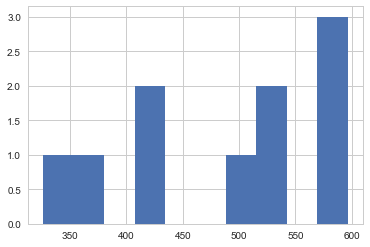

In [54]:
plt.hist(uni_sample)
sns.set_style('whitegrid')
plt.show()

So increasing the size of our set to 4000 values, instead of 10, should give us a better indication of the distribution of data that this function generates

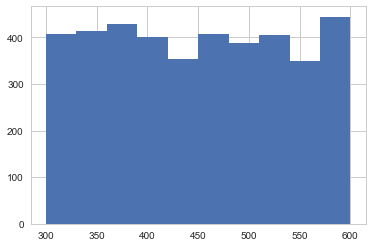

In [55]:
uni_sample=(np.random.uniform(300, 600, size= 4000))
sns.set_style('whitegrid')
plt.hist(uni_sample)
plt.show()

This function generates a float number between two values, and as I have set my values to be integers, there is an infinite number of possibile outcomes. The uniform function returns an even spread of values in the low to high interval, but the histogram above should not be taken to imply that even value between 300 and 600 is represented.

### Binomial Distribution

The Binomial Distribution in probability is the distribution of successes in  Binomial or Bernoulli trial. 

In a Bernoulli trial
* There are n independent trials
* Each trial has only two possible outcomes, ie Heads or Tails, Pass or Fail
* The probability of success is the same in each trial, and is denoted with the letter p

So the random.binomial() function takes the same parameters and can be used to simulate probability experiments.

### Flipping a Coin

If you flip a coin you can get either heads or tails, and each has a 50% chance of success. Let's say that I flip a coin 100 times, and I want to get heads. The binomial() function can simulate that experiment. 

In [56]:
heads = np.random.binomial(100, 0.5, 1)
print('I got %.0f heads, and %.0f tails in 100 trials' % (sum(heads), 100 - sum(heads)))

I got 53 heads, and 47 tails in 100 trials


Now what if I have 30 people all doing the same experiment. 

30 people each flip a coin 100 times and record their results, then we'd have 3000 flips of a coin. Our experimental probability should be even closer to our expected probability with that many trials. So let's run that simulation and see what we get.

In [57]:
new_heads = np.random.binomial(100, 0.5, 30)
print('We get %.0f heads, and %.0f tails in 3000 trials' % (sum(new_heads), 30*100 - sum(new_heads)))

We get 1474 heads, and 1526 tails in 3000 trials


Plotting the data from my 30 helpers, shows that there are no outliers with most getting between 40 and 60 heads when they flipped the coin

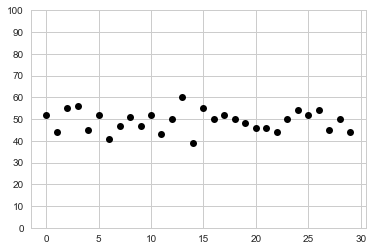

In [58]:
plt.plot(new_heads, 'ko')
plt.xticks(range(0, 35, 5))
plt.yticks(range(0, 101, 10))
plt.show()

### Normal Distribution

A Normal Distribution is symmetrical about the mean of the set of data. 

To generate a random number that fits a set of normally distributed data points, you need to know both the mean and the standard deviation. The Empirical Rule states that 68% of data is within one standard deviation of the mean, but 99.7% of data is found with in three standard deviations of the mean, as shown below.


<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/2/22/Empirical_rule_histogram.svg/1106px-Empirical_rule_histogram.svg.png" width = '400'>

Therefore when we randomly generate number that fit a normal distrbution we can expect to get a distribution like the one above. 

If I was to randomly generate a number from a normally distributed set, with mean 32 and standard deviation 5, I would most likely get a value between 22 and 42, as 95% of data is within two standard deviation of the mean.

In [60]:
# Generating a random number, with mean 32 and st.dev. 5
norm_x = np.around(np.random.normal(32, 5), decimals = 3)
norm_x


28.034

To generate a set of values which follow the normal distribution, numpy.random provide two different functions; the standard_normal() and normal() functions.

Standard_normal() returns a number(s) which fit the standard normal distribution, where the mean is 0 and standard deviation is 1. As the mean and deviation are set by default, the only parameter to be entered is the number of values we want to generate. Here, I have generated a standard normal set with 1000 values

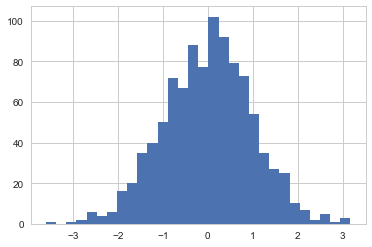

In [40]:
st_norm = np.random.standard_normal(1000)
plt.hist(st_norm, bins = 30)
sns.set_style('whitegrid')
plt.show()

Normal() also generates a set which fits the normal distribution, but the mean and st.deviation are parameters of the function. So you can generate data for any mean and standard deviation easily. 

Below I have generated 100 values, that model normally distributed data with mean 32, and standard deviation 5. 

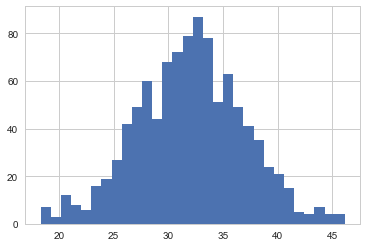

In [63]:
norm= np.random.normal(32, 5, 1000)
plt.hist(norm, bins=30)
sns.set_style('whitegrid')
plt.show()


### Four

### FIve

## Seeds and Pseudo-random Numbers

## References

* [NumPy v1.15 Manual, Random sampling (numpy.random)](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html)